# Tutorial sobre cómo usar Google Colab en Física de la Radioterapia
-----
## Montar gDrive

Para acceder a los archivos almacenados en nuestro Google Drive desde cuadernos Colab primero es necesario montar el disco.

El siguiente código realiza ese proceso. Para completarlo Colab nos pedira autorización para acceder a nuestro disco

In [ ]:
# - Importar el módulo para acceder a Drive
from google.colab import drive
# - Montar el disco
drive.mount('/content/gdrive')

Este código puede ser introducido directamente por Colab utiilizando la barra lateral > Archivos >  Montar Drive

Colab nos pedirá que ejecutemos el código introducido

![Menú Archivos](https://raw.githubusercontent.com/csarux/TutorialesFisicaRadioterapia/main/Colab/ArchivosMontarDrive.png) 
![Código para montar Drive](https://raw.githubusercontent.com/csarux/TutorialesFisicaRadioterapia/main/Colab/ArchivosMontarDriveCelda.png)

## Acceso a datos

Tras montar el disco es posible utilizar los comnado `%pwd %cd %ls` para ver directorio de trabajo actual, cambiar de directorio o listar el contenido del directorio.

Para conocer la ruta hasta un archivo que nos interese podemos utilizar la barra lateral para navegar gráficamente por la estructura de carpetas de nuestro Drive

![Estructura de Carpetas](https://raw.githubusercontent.com/csarux/TutorialesFisicaRadioterapia/main/Colab/EstructuraCarpetas.png)

Tras copiar la ruta podemos pegarla en una celda de código tras el comnando `%cd`


In [ ]:
%cd '/content/drive/MyDrive/Física Radioterapia Master Física Biomédica'

En la celda anterior es necesario el empleo de las comillas por que la ruta incluye espacios en el nombre las carpetas.

Python es muy flexible para manejar archivos de datos. Una opción muy potente es utilizar el módulo pandas.

Tras importar el módulo podemos leer de forma fácil por ejemplo archivos almacenados en formato valores separados por comas (.csv) o Excel (.xlsx)

```
import pandas as pd
pd.read_csv('ArchivoDatos.csv') # o cualquier extensión de archivo de texto en formato csv
pd.read_excel('ArchivoDatos.xlsx')
```

Estos comandos incluyen multitud de opciones. Para más información leer sus páginas de documentación [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) y [pandas.read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

La salida de estos comandos es una estructura de datos llamada Pandas DataFrame. La habitual es recoger su salida en una variable para después trabajar sobre ella

`datosdf = pd.read_excel('ArchivoDatos.xlsx')`

Para mostar un ejemplo del comando anterior descargamos primero una copia del archivo de datos que utilizamos en el primer entregable de la asignatura

In [ ]:
!wget https://raw.githubusercontent.com/csarux/TutorialesFisicaRadioterapia/main/Colab/DVHs.xlsx

Y ahora importamos el módulo pandas y leemos el archivo

In [1]:
import pandas as pd

df = pd.read_excel('DVHs.xlsx')

## Visualización de datos

Ejecuntado la celda sobre la variable DataFrame obtenemos una vista en forma de tabla de su contenido

In [2]:
df

,Dr,D,Boost,Mama,Pulmon
0,0.0,0.00,100.0,100.000000,100.0
1,0.1,0.06,100.0,100.000000,100.0
2,0.2,0.12,100.0,100.000000,100.0
3,0.3,0.18,100.0,100.000000,100.0
4,0.4,0.24,100.0,100.000000,100.0
...,...,...,...,...,...
1072,107.2,64.32,0.0,0.027600,0.0
1073,107.3,64.38,0.0,0.017225,0.0
1074,107.4,64.44,0.0,0.009247,0.0
1075,107.5,64.50,0.0,0.004144,0.0


Las opciones de manipulación de datos son prácticamente ilimitadas. El capítulo tres del libro [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) está dedicado enteramente a esta materia.

El enlace anterior lleva a una implentación del libro en Colab que srive como ejemplo de cómo manejar datos en este entorno.

Pandas también ofrece utilidades para mostrar gráficamente los datos contenidos en un DataFrame

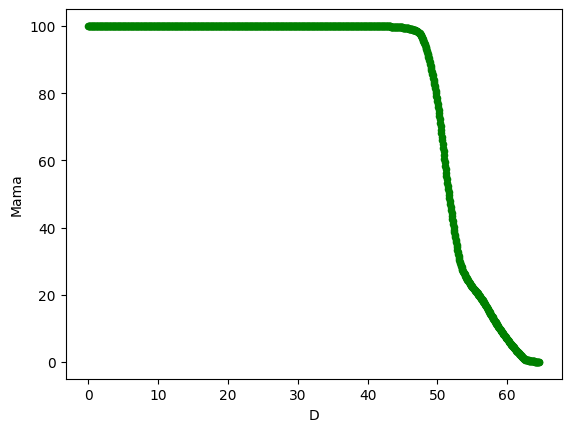

In [10]:
ax = df.plot.scatter(x='D', y='Mama', c='green')

Las opciones de visualización también son variadas. Si por ejemplo queremos cambiar el color de la representación en función del valor de otra variable podemos hacer

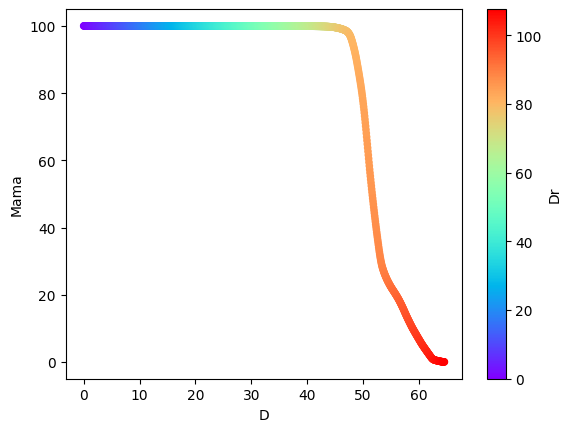

In [12]:
ax = df.plot.scatter(x='D', y='Mama', c='Dr', colormap='rainbow')

El módulo esencial para las representaciones gráficas en Python es `matplotlib`

Podemos visualizar los datos del DataFrame mediante este módulo

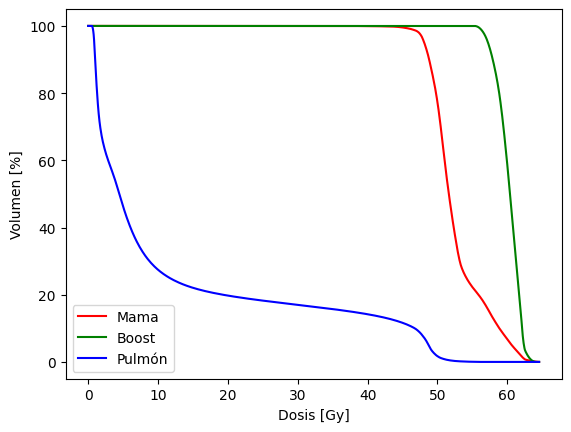

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df.D, df.Mama, 'r-', label='Mama')
ax.plot(df.D, df.Boost, 'g-', label='Boost')
ax.plot(df.D, df.Pulmon, 'b-', label='Pulmón')
ax.set_xlabel('Dosis [Gy]')
ax.set_ylabel('Volumen [%]')
ax.legend()
plt.show()